In [1]:
import pandas as pd

## 1. Load the dataset into a Pandas DataFrame.


In [2]:
df = pd.read_csv('reviews.csv')

## 2. Set the 'id' column as the index and display the first 10 rows of the dataset.


In [3]:
df.set_index('id', inplace=True)
df.head(10)

,restaurant_name,reviewer_name,review_text,rating,date_of_visit,location
id,,,,,,
0,Грибова Колиба,Марта,Офіціантка Повільно Обслуговувала велике меню ...,3,2022-05-30,Миргород
1,Стильна Кавʼярня,Устим,Могло Бути Краще чудово велика сирна тарілка н...,4,2022-09-06,Долинська
2,Грибова Колиба,Валентина,Чудово велике меню приємні ціни піца смачна.,5,2024-01-09,Бібрка
3,Мʼясна Пекарня,Богуслав,Не Сподобалось чудово гарна територія довго че...,2,2023-05-13,Снігурівка
4,Апетитна Пирогівня,Лариса,Офіціантка Повільно Обслуговувала принесли пер...,1,2024-01-21,Корюківка
5,Пікантна Колиба,Орися,Було Смачно не сподобалось офіціантка повільно...,4,2022-07-01,Львів
6,Відома Таверна,Леонід,Піца Смачна комфортно класне обслуговування по...,1,2022-12-27,Луцьк
7,Мʼясна Шашлична,Аарон,Довго Чекали На Замовлення приємні ціни найкра...,3,2022-03-11,Костопіль
8,Грибова Закусочна,Опанас,Раджу Відвідати атмосфера чудова чудово вражен...,1,2023-04-14,Прилуки


## 3. Print the summary statistics for the numerical columns.

In [4]:
df[['rating']].describe()

,rating
count,500.000000
mean,2.890000
std,1.393479
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## 4.1. Skip data with missing columns.


In [5]:
df.dropna(inplace=True)

## 4.2. Skip data with invalid rating value (it should be within the 1 to 5 range)

In [6]:
df = df[(df['rating'] >= 1) & (df['rating'] <= 5)]

## 5. Create a new column "Review Length" that represents the number of words in the review text.

In [16]:
df['review_length'] = df['review_text'].str.split().apply(len)
df.head()

,restaurant_name,reviewer_name,review_text,rating,date_of_visit,location,review_length,month_of_visit
id,,,,,,,,
0,Грибова Колиба,Марта,Офіціантка Повільно Обслуговувала велике меню ...,3,2022-05-30,Миргород,19,5
1,Стильна Кавʼярня,Устим,Могло Бути Краще чудово велика сирна тарілка н...,4,2022-09-06,Долинська,27,9
2,Грибова Колиба,Валентина,Чудово велике меню приємні ціни піца смачна.,5,2024-01-09,Бібрка,7,1
3,Мʼясна Пекарня,Богуслав,Не Сподобалось чудово гарна територія довго че...,2,2023-05-13,Снігурівка,11,5
4,Апетитна Пирогівня,Лариса,Офіціантка Повільно Обслуговувала принесли пер...,1,2024-01-21,Корюківка,18,1


## 6. Find the average rating for each restaurant and display the top 10 highest-rated restaurants.

In [8]:
df.groupby('restaurant_name')['rating'].mean().nlargest(n=10)

restaurant_name
Мʼясна Шашлична        3.400000
Найкраща Кухня         3.277778
Ароматна Шампанерія    3.214286
Стильна Кавʼярня       3.208333
Стильна Канапка        3.190476
Мʼясна Пекарня         3.133333
Маленька Шампанерія    3.133333
Чудова Кухня           3.105263
Вишукана Піцерія       3.083333
Смачна Забігайлівка    3.083333
Name: rating, dtype: float64

## 7. Identify the 5 most frequent reviewers and the average rating they give.

In [9]:
df.groupby('reviewer_name').agg(avg_rating=('rating', 'mean'), count_rating=('rating', 'count')).nlargest(5, 'count_rating')


,avg_rating,count_rating
reviewer_name,,
Давид,3.000000,9
Марія,2.500000,8
Юстим,2.875000,8
Аврелій,3.285714,7
Богданна,2.714286,7


## 8. Calculate the average rating per month.

In [10]:
df['month_of_visit'] = pd.to_datetime(df['date_of_visit']).dt.month
df.groupby('month_of_visit')['rating'].mean()

month_of_visit
1     2.734694
2     2.897436
3     2.574468
4     2.777778
5     3.117647
6     2.966667
7     3.175000
8     2.900000
9     2.914894
10    2.977273
11    2.853659
12    2.805556
Name: rating, dtype: float64

## 9. Find the restaurant with the most reviews.


In [11]:
df.groupby('restaurant_name')['rating'].count().nlargest(n=1)


restaurant_name
Відома Таверна    25
Name: rating, dtype: int64

## 10. Determine the city with the highest average rating.

In [12]:
df.groupby('location')['rating'].mean().nlargest(n=1)

location
Алмазна    5.0
Name: rating, dtype: float64

## 11. Visualization
### 11.1. Plot the distribution of ratings across all reviews.

<Axes: xlabel='date_of_visit', ylabel='rating'>

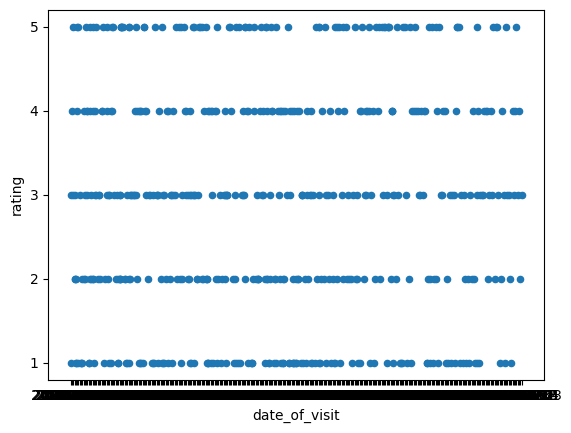

In [18]:
df.plot(kind = 'scatter', x = 'date_of_visit', y = 'rating', yticks=[1, 2, 3, 4, 5])

### 11.2. Create a time series plot showing the average rating per month.

<Axes: xlabel='month_of_visit'>

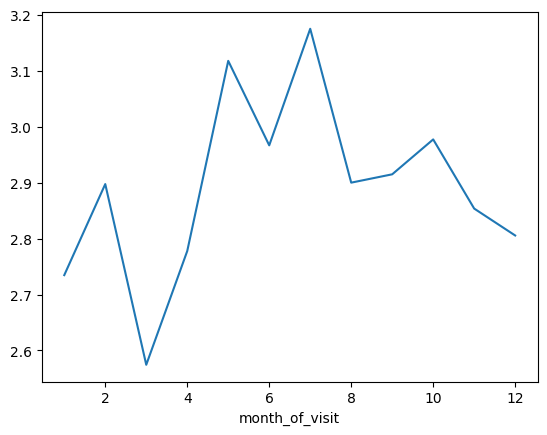

In [14]:
df.groupby('month_of_visit')['rating'].mean().plot()

## 12. Save the cleaned and manipulated DataFrame to a new CSV file.

In [15]:
df.to_csv('clean_reviews.csv')